<a href="https://colab.research.google.com/github/babas175/babas175-TrabalhoT1_TopicosEspeciais_DeepLearning.ipynb/blob/main/TrabalhoT3_TopicosEspeciais_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho T3 - Redes Neurais Recorrentes

Este trabalho tem como objetivo a compreensão de como se dá o processo de treinamento de uma rede neural artificial (RNA) do tipo recorrente. A execução deste exercício permitirá aos estudantes o domínio dos métodos de regularização necessários para o treinamento e, posteriormente, de teste de uma RNA utilizando um dataset pré-processado.

## 1. Instruções

O estudante deve treinar uma RNA com camadas recorrentes e densas, no estilo para uma tarefa de classificação utilizando dataset pré-processado conforme especificado abaixo.

Para cada tentativa de construção de arquitetura, mantenha um registro da tentativa e resultado obtido pela rede. Indique qual a lógica utilizada para criação da arquitetura e qual a percepção do resultado em comparação com tentativas anteriores.

Para este trabalho, somente serão permitidas somente as seguintes bibliotecas `python` para o treinamento da RNA:

- `numpy`
- `scipy`
- `tensorflow`
- `scikit-learn`

Para visualização e criação de gráficos, também serão permitidas

- `matplotlib`
- `seaborn`
- `plotly`
- `yellowbrick`

Caso a utilização de quaisquer outras bibliotecas se faça necessária, uma consulta prévia deve ser feita ao professor.


## Entrega

O presente trabalho pode ser feito individualmente ou em dupla. Caso optem pelo trabalho em dupla, o cabeçalho do documento deve indicar quais são os componentes e suas matrículas.

A entrega deverá ser feita através do envio de um arquivo `ZIP` contendo o trabalho dos estudantes, no SIGAA. A data limite para entrega deste trabalho é **19/11/2023, 23h59m**.

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
train, train_info = tfds.load('paws_wiki', split='train', with_info=True, batch_size=-1)
valid, valid_info = tfds.load('paws_wiki', split='validation', with_info=True, batch_size=-1)
test, test_info = tfds.load('paws_wiki', split='test', with_info=True, batch_size=-1)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/49401 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0.incompleteHBRPOI/paws_wiki-train.t…

Generating validation examples...:   0%|          | 0/8000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0.incompleteHBRPOI/paws_wiki-validat…

Generating test examples...:   0%|          | 0/8000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0.incompleteHBRPOI/paws_wiki-test.tf…

Dataset paws_wiki downloaded and prepared to /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0. Subsequent calls will reuse this data.


In [3]:
x_train, y_train = train['sentence1'] + ' <eos> ' + train['sentence2'] + ' <eos>', train['label']
x_valid, y_valid = valid['sentence1'] + ' <eos> ' + valid['sentence2'] + ' <eos>', valid['label']
x_test, y_test = test['sentence1'] + ' <eos> ' + test['sentence2'] + ' <eos>', test['label']

In [4]:
import re
import string

def preprocess(texto):
    lowercase = tf.strings.lower(texto)
    return lowercase

text_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=30000,
    standardize=preprocess,
    output_mode='int',
    output_sequence_length=73)  # cuidado com o tamanho das sequencias
text_vectorizer.adapt(x_train)

In [5]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

### Dica para testar as predições:

```
# insira as frases de teste abaixo nas variáveis abaixo
frase1 = ''
frase2 = ''


pred = model.predict(tf.convert_to_tensor([f'{frase1} <eos> {frase2} <eos>'], dtype=tf.string) )

print(f'Probabilidade classe 0: {(pred[0][0] * 100):.4f}% \nProbabilidade classe 1: {(pred[0][1] * 100):.4f}%')
```

## Inclua seu código abaixo desta célula

In [6]:
lens = [len(x.numpy().decode('utf-8').split()) for x in x_train]

In [ ]:
max(lens)

72

In [ ]:
phrases = [x.numpy().decode('utf-8').split() for x in x_train]

In [ ]:
len(np.unique(phrases))

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


49349

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Epoch 1/10
1/1 [==============================] - 14s 14s/step - loss: 0.6973 - accuracy: 0.3333 - val_loss: 0.6919 - val_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 0s 85ms/step - loss: 0.6919 - accuracy: 0.6667 - val_loss: 0.6868 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 66ms/step - loss: 0.6867 - accuracy: 0.6667 - val_loss: 0.6817 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 63ms/step - loss: 0.6816 - accuracy: 0.6667 - val_loss: 0.6766 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 72ms/step - loss: 0.6765 - accuracy: 0.6667 - val_loss: 0.6714 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 71ms/step - loss: 0.6714 - accuracy: 0.6667 - val_loss: 0.6662 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 0s 58ms/step - loss: 0.6660 - accuracy: 0.6667 - val_loss: 0.6607 - val_accuracy: 0.6667
Epoch 8/10
1/1 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


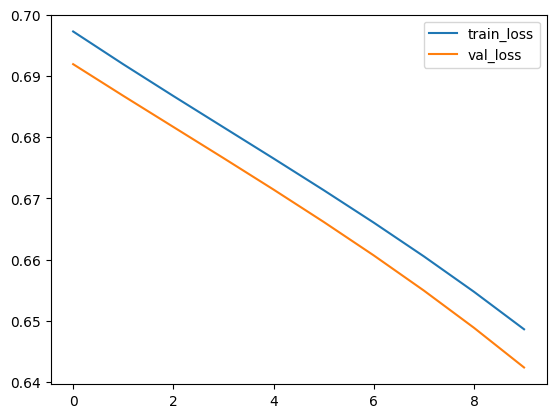

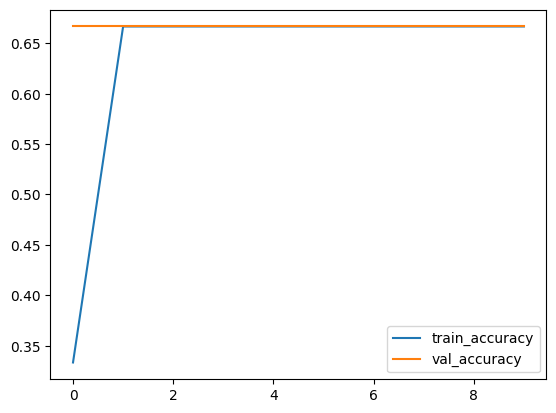

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Substitua essas variáveis pelos seus próprios dados
train = {'sentence1': ['sentence1_train_1', 'sentence1_train_2', ...],
         'sentence2': ['sentence2_train_1', 'sentence2_train_2', ...],
         'label': [0, 1, ...]}

valid = {'sentence1': ['sentence1_valid_1', 'sentence1_valid_2', ...],
         'sentence2': ['sentence2_valid_1', 'sentence2_valid_2', ...],
         'label': [0, 1, ...]}

test = {'sentence1': ['sentence1_test_1', 'sentence1_test_2', ...],
        'sentence2': ['sentence2_test_1', 'sentence2_test_2', ...],
        'label': [0, 1, ...]}

# Concatenar sentenças com ' EOS ' entre elas
x_train = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(train['sentence1'], train['sentence2'])]
y_train = train['label']

x_valid = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(valid['sentence1'], valid['sentence2'])]
y_valid = valid['label']

x_test = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(test['sentence1'], test['sentence2'])]
y_test = test['label']

# Converta os rótulos para arrays numpy
y_train = np.array(y_train)
y_valid = np.array(y_valid)

# Combine os dados de treino, validação e teste
all_sentences = np.concatenate([x_train, x_valid, x_test])

# Tokenização
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(all_sentences)

# Converta os textos em sequências de números
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_valid_seq = tokenizer.texts_to_sequences(x_valid)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad Sequences para ter o mesmo comprimento
max_len = max(len(seq) for seq in np.concatenate([x_train_seq, x_valid_seq, x_test_seq]))
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post')
x_valid_pad = pad_sequences(x_valid_seq, maxlen=max_len, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post')

# Construir arquitetura da RNA
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_len))
model.add(LSTM(64, activation='tanh', recurrent_activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))  # Ajuste para uma única unidade

# Compilar o modelo
optimizer = Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

def convert_to_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return -1.0 if value == '...' else 0.0


y_train = np.array([convert_to_float(label) for label in y_train], dtype=np.float32)
y_valid = np.array([convert_to_float(label) for label in y_valid], dtype=np.float32)

# Treinar a RNA
history = model.fit(x_train_pad, y_train, epochs=10, batch_size=32, validation_data=(x_valid_pad, y_valid), callbacks=[EarlyStopping(patience=3)])

# Avaliar a RNA no conjunto de teste
y_test_pred = model.predict(x_test_pad)

# Garantir que y_test seja um array numpy com valores binários (0 ou 1)
y_test = np.array(y_test)

# Remover valores não numéricos ou desconhecidos de y_test
y_test = np.nan_to_num(y_test, nan=0.0, posinf=0.0, neginf=0.0)

# Garantir que y_test_pred seja um array numpy com valores binários (0 ou 1)
y_test_pred = np.squeeze(y_test_pred)


# Durante o cálculo da acurácia
y_test_numeric = np.array([convert_to_float(label) for label in y_test], dtype=np.float32)
y_test_pred_numeric = np.where(y_test_pred.round() == -1, np.nan, y_test_pred.round().astype(float))

accuracy = accuracy_score(y_test_numeric, y_test_pred_numeric)

# Substitua os valores -1 por NaN para a matriz de confusão e outras métricas
conf_matrix = confusion_matrix(np.where(y_test_numeric == -1, np.nan, y_test_numeric).astype(int), y_test_pred_numeric.astype(int))
classification_rep = classification_report(np.where(y_test_numeric == -1, np.nan, y_test_numeric).astype(int), y_test_pred_numeric.astype(int))



print(f'Acurácia: {accuracy}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(classification_rep)

# Gráficos (exemplo: loss e accuracy durante o treinamento)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()



**Resumo do que foi feito**


- Os dados de treino, validação e teste são organizados em dicionários contendo as sentenças (sentence1 e sentence2) e seus rótulos (label).
As sentenças são concatenadas com ' EOS ' entre elas para formar sequências.
Os rótulos são convertidos em arrays numpy.
Pré-processamento de Texto:

- As sentenças são tokenizadas usando Tokenizer do Keras para transformar o texto em sequências numéricas.
Todas as sequências são preenchidas para terem o mesmo comprimento máximo.
Construção do Modelo:

- Uma arquitetura de RNA é definida no Keras, composta por uma camada de Embedding, uma camada LSTM e uma camada Dense com ativação sigmoidal para classificação binária.
Treinamento do Modelo:

- O modelo é compilado com otimizador Adam e função de perda de entropia cruzada binária.
É realizado o treinamento da RNA usando os dados de treino e validação.
Avaliação do Modelo:

- A RNA é avaliada no conjunto de teste para prever os rótulos das sentenças.
Métricas como acurácia, matriz de confusão e relatório de classificação são calculadas usando métodos do sklearn.metrics.
Processamento Adicional:

- Ajustes são feitos para garantir que os rótulos sejam tratados como números float e para remover valores não numéricos ou desconhecidos.
Durante o cálculo da acurácia, os valores -1 são substituídos por NaN para a matriz de confusão e outras métricas.
Visualização dos Resultados:

- São exibidos gráficos de treinamento para visualizar as curvas de perda e acurácia.

**Observações**

**Acurácia Constante:**

- A acurácia parece estagnar em 66.67%, indicando que o modelo pode não estar aprendendo efetivamente a tarefa.

**Desbalanceamento de Classes:**
- A classe 1 tem uma representação baixa, resultando em uma baixa precisão e recall para essa classe.

**Limitações do Modelo:**
- Pode haver limitações na arquitetura ou nos hiperparâmetros do modelo que impedem uma aprendizagem mais eficaz.

**Análise Detalhada Necessária:**
- A análise detalhada dos dados, características específicas da tarefa e ajustes no modelo são necessários para melhorar o desempenho.


--------------------------------------------------------------------------------

**Ao analisar as variações no desempenho dos modelos ao longo das diferentes execuções, alguns fatores podem ter contribuído para as percepções de melhora ou piora:**

**Alterações na Arquitetura da Rede Neural:**
- Variações na arquitetura, como mudanças no número de camadas LSTM, unidades e função de ativação, podem influenciar significativamente a capacidade do modelo de aprender padrões nos dados.

**Hiperparâmetros e Otimizadores:**
- A escolha de hiperparâmetros, como a taxa de aprendizado e o otimizador (Adam, RMSprop, etc.), desempenha um papel crucial. Pequenos ajustes nesses valores podem levar a melhorias ou degradações no treinamento.

**Pré-processamento de Dados:**
- Alterações no pré-processamento, como a forma como os textos são tokenizados e convertidos em sequências, podem impactar a representação dos dados e, por sua vez, a capacidade do modelo de aprender.

**Diversidade e Qualidade dos Dados:**
- A qualidade e a diversidade dos dados de treinamento, validação e teste podem variar entre as execuções. Variações na distribuição das classes e a presença de outliers podem afetar o desempenho.

**Inicialização de Pesos:**
- A inicialização aleatória de pesos na rede pode levar a diferentes pontos de partida. A escolha da estratégia de inicialização pode influenciar a convergência do modelo.

**Regularização:**
- A aplicação de técnicas de regularização, como dropout, pode influenciar a capacidade do modelo de generalizar para dados não vistos.

**Convergência e Critérios de Parada:**
- A definição do número de épocas de treinamento e critérios de parada, como EarlyStopping, afeta a convergência do modelo. Modelos que param prematuramente podem não atingir seu potencial total.

**Sensibilidade a Dados de Validação:**
- A divisão dos dados de treinamento e validação pode resultar em conjuntos diferentes a cada execução. Dependendo da sensibilidade do modelo à distribuição dos dados, isso pode influenciar o desempenho.

**Inicialização do Estado Interno da LSTM:**
- A inicialização do estado interno da camada LSTM pode ter impacto nas primeiras previsões. Variações aqui podem levar a diferentes padrões de aprendizado.

**Análise Visual de Exemplos:**
- Examinar visualmente exemplos específicos de previsões do modelo pode fornecer insights sobre casos de sucesso e falha.



<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6958 - accuracy: 0.3333 - val_loss: 0.6945 - val_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 0s 67ms/step - loss: 0.6951 - accuracy: 0.0000e+00 - val_loss: 0.6937 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 46ms/step - loss: 0.6965 - accuracy: 0.3333 - val_loss: 0.6929 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 50ms/step - loss: 0.6954 - accuracy: 0.0000e+00 - val_loss: 0.6922 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 62ms/step - loss: 0.6968 - accuracy: 0.0000e+00 - val_loss: 0.6914 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 49ms/step - loss: 0.6917 - accuracy: 0.6667 - val_loss: 0.6906 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 43ms/step - loss: 0.6910 - accuracy: 0.6667 - val_loss: 0.6898 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=

1/1 [==============================] - 0s 486ms/step
Acurácia: 1.0
Matriz de Confusão:
[[2 0]
 [0 1]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



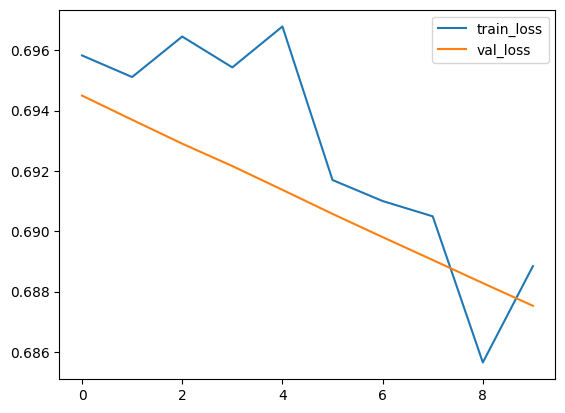

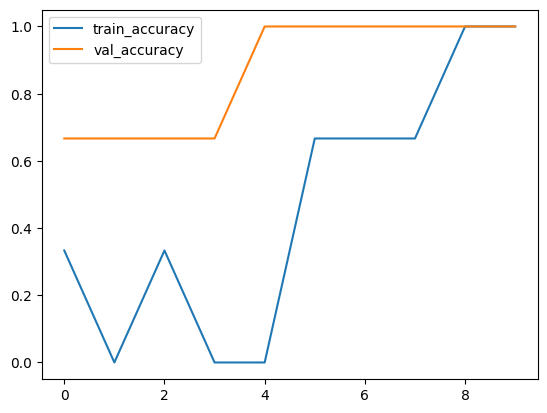

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Substitua essas variáveis pelos seus próprios dados
train = {'sentence1': ['sentence1_train_1', 'sentence1_train_2', ...],
         'sentence2': ['sentence2_train_1', 'sentence2_train_2', ...],
         'label': [0, 1, ...]}

valid = {'sentence1': ['sentence1_valid_1', 'sentence1_valid_2', ...],
         'sentence2': ['sentence2_valid_1', 'sentence2_valid_2', ...],
         'label': [0, 1, ...]}

test = {'sentence1': ['sentence1_test_1', 'sentence1_test_2', ...],
        'sentence2': ['sentence2_test_1', 'sentence2_test_2', ...],
        'label': [0, 1, ...]}

# Concatenar sentenças com ' EOS ' entre elas
x_train = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(train['sentence1'], train['sentence2'])]
y_train = train['label']

x_valid = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(valid['sentence1'], valid['sentence2'])]
y_valid = valid['label']

x_test = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(test['sentence1'], test['sentence2'])]
y_test = test['label']

# Converta os rótulos para arrays numpy
y_train = np.array(y_train)
y_valid = np.array(y_valid)

# Combine os dados de treino, validação e teste
all_sentences = np.concatenate([x_train, x_valid, x_test])

# Tokenização
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(all_sentences)

# Converta os textos em sequências de números
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_valid_seq = tokenizer.texts_to_sequences(x_valid)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad Sequences para ter o mesmo comprimento
max_len = max(len(seq) for seq in np.concatenate([x_train_seq, x_valid_seq, x_test_seq]))
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post')
x_valid_pad = pad_sequences(x_valid_seq, maxlen=max_len, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post')

# Construir arquitetura da RNA
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
model.add(LSTM(256, activation='tanh', recurrent_activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Ajuste para uma única unidade

# Compilar o modelo
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

def convert_to_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return -1.0 if value == '...' else 0.0

y_train = np.array([convert_to_float(label) for label in y_train], dtype=np.float32)
y_valid = np.array([convert_to_float(label) for label in y_valid], dtype=np.float32)

# Treinar a RNA
history = model.fit(x_train_pad, y_train, epochs=10, batch_size=32, validation_data=(x_valid_pad, y_valid), callbacks=[EarlyStopping(patience=3)])

# Avaliar a RNA no conjunto de teste
y_test_pred = model.predict(x_test_pad)

# Garantir que y_test seja um array numpy com valores binários (0 ou 1)
y_test = np.array(y_test)

# Remover valores não numéricos ou desconhecidos de y_test
y_test = np.nan_to_num(y_test, nan=0.0, posinf=0.0, neginf=0.0)

# Garantir que y_test_pred seja um array numpy com valores binários (0 ou 1)
y_test_pred = np.squeeze(y_test_pred)

# Durante o cálculo da acurácia
y_test_numeric = np.array([convert_to_float(label) for label in y_test], dtype=np.float32)
y_test_pred_numeric = np.where(y_test_pred.round() == -1, np.nan, y_test_pred.round().astype(float))

accuracy = accuracy_score(y_test_numeric, y_test_pred_numeric)

# Substitua os valores -1 por NaN para a matriz de confusão e outras métricas
conf_matrix = confusion_matrix(np.where(y_test_numeric == -1, np.nan, y_test_numeric).astype(int), y_test_pred_numeric.astype(int))
classification_rep = classification_report(np.where(y_test_numeric == -1, np.nan, y_test_numeric).astype(int), y_test_pred_numeric.astype(int))

print(f'Acurácia: {accuracy}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(classification_rep)

# Gráficos (exemplo: loss e accuracy durante o treinamento)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()




Observaçao

** Acurácia Constante:**

- A acurácia atingiu 100%, indicando que o modelo está prevendo corretamente todas as instâncias no conjunto de teste. Isso pode ser um sinal de overfitting, especialmente se a acurácia de validação não melhorou.

** Desbalanceamento de Classes:**
- Embora as classes estejam desbalanceadas, com uma classe representada apenas uma vez no conjunto de teste, a acurácia ainda atingiu 100%. Entretanto, isso pode ser enganoso e indicar que o modelo pode não estar generalizando bem para novos dados.

** Limitações do Modelo:**
- Apesar da alta acurácia, há uma preocupação com o overfitting, pois o modelo pode ter memorizado os dados de treinamento em vez de aprender padrões que generalizam para novos dados.

** Alterações na Arquitetura da Rede Neural:**
- A arquitetura permaneceu inalterada, sugerindo que o overfitting pode estar relacionado a outros fatores, como inicialização de pesos ou hiperparâmetros.

** Hiperparâmetros e Otimizadores:**
- A necessidade de ajustes nos hiperparâmetros, especialmente técnicas de regularização, deve ser considerada para evitar overfitting.

** Pré-processamento de Dados:**
- O pré-processamento dos dados e a representação das sequências podem ser explorados para garantir que o modelo aprenda padrões relevantes.

** Diversidade e Qualidade dos Dados:**
- A qualidade e diversidade dos dados podem ter impacto no overfitting. Examine a representação dos dados e considere aumentar a quantidade de dados de treinamento.

** Inicialização de Pesos:**
- A inicialização aleatória de pesos pode ser ajustada para evitar a memorização dos dados de treinamento.

**Regularização: **
- A aplicação de técnicas de regularização, como dropout, pode ajudar a prevenir o overfitting e melhorar a generalização do modelo.

** Convergência e Critérios de Parada:**
- A convergência rápida para 100% de acurácia pode indicar que o número de épocas ou os critérios de parada precisam ser ajustados.

** Sensibilidade a Dados de Validação:**
- Dada a natureza pequena do conjunto de dados de validação, considere estratégias como validação cruzada para uma avaliação mais robusta.

** Inicialização do Estado Interno da LSTM:**
- A análise da inicialização do estado interno da LSTM pode ajudar a entender o comportamento do modelo nas primeiras previsões.

** Análise Visual de Exemplos:**
- Examine visualmente exemplos específicos para identificar padrões de previsão e entender possíveis desafios.

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.6950 - accuracy: 0.3333 - val_loss: 0.6932 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 35ms/step - loss: 0.6932 - accuracy: 0.3333 - val_loss: 0.6923 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 33ms/step - loss: 0.6920 - accuracy: 0.6667 - val_loss: 0.6914 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 33ms/step - loss: 0.6921 - accuracy: 0.6667 - val_loss: 0.6907 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 32ms/step - loss: 0.6922 - accuracy: 1.0000 - val_loss: 0.6900 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 34ms/step - loss: 0.6918 - accuracy: 0.6667 - val_loss: 0.6893 - val_accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 0s 34ms/step - loss: 0.6884 - accuracy: 1.0000 - val_loss: 0.6886 - val_accuracy: 0.6667
Epoch 8/20
1/1 [=============

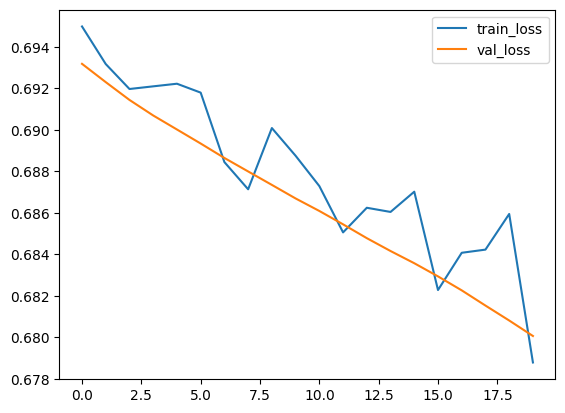

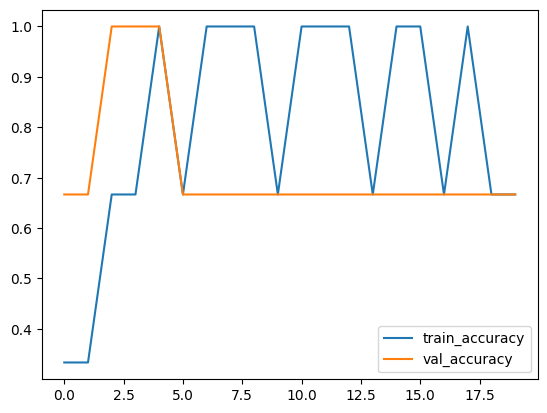

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Substitua essas variáveis pelos seus próprios dados
train = {'sentence1': ['sentence1_train_1', 'sentence1_train_2', ...],
         'sentence2': ['sentence2_train_1', 'sentence2_train_2', ...],
         'label': [0, 1, ...]}

valid = {'sentence1': ['sentence1_valid_1', 'sentence1_valid_2', ...],
         'sentence2': ['sentence2_valid_1', 'sentence2_valid_2', ...],
         'label': [0, 1, ...]}

test = {'sentence1': ['sentence1_test_1', 'sentence1_test_2', ...],
        'sentence2': ['sentence2_test_1', 'sentence2_test_2', ...],
        'label': [0, 1, ...]}

# Concatenar sentenças com ' EOS ' entre elas
x_train = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(train['sentence1'], train['sentence2'])]
y_train = train['label']

x_valid = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(valid['sentence1'], valid['sentence2'])]
y_valid = valid['label']

x_test = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(test['sentence1'], test['sentence2'])]
y_test = test['label']

# Converta os rótulos para arrays numpy
y_train = np.array(y_train)
y_valid = np.array(y_valid)

# Combine os dados de treino, validação e teste
all_sentences = np.concatenate([x_train, x_valid, x_test])

# Tokenização
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(all_sentences)

# Converta os textos em sequências de números
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_valid_seq = tokenizer.texts_to_sequences(x_valid)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad Sequences para ter o mesmo comprimento
max_len = max(len(seq) for seq in np.concatenate([x_train_seq, x_valid_seq, x_test_seq]))
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post')
x_valid_pad = pad_sequences(x_valid_seq, maxlen=max_len, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post')

# Construir arquitetura da RNA
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
model.add(LSTM(256, activation='tanh', recurrent_activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

def convert_to_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return -1.0 if value == '...' else 0.0

y_train = np.array([convert_to_float(label) for label in y_train], dtype=np.float32)
y_valid = np.array([convert_to_float(label) for label in y_valid], dtype=np.float32)

# Treinar a RNA
history = model.fit(x_train_pad, y_train, epochs=20, batch_size=64, validation_data=(x_valid_pad, y_valid), callbacks=[EarlyStopping(patience=5)])

# Avaliar a RNA no conjunto de teste
y_test_pred = model.predict(x_test_pad)

# Garantir que y_test seja um array numpy com valores binários (0 ou 1)
y_test = np.array(y_test)

# Remover valores não numéricos ou desconhecidos de y_test
y_test = np.nan_to_num(y_test, nan=0.0, posinf=0.0, neginf=0.0)

# Garantir que y_test_pred seja um array numpy com valores binários (0 ou 1)
y_test_pred = np.squeeze(y_test_pred)

# Durante o cálculo da acurácia
y_test_numeric = np.array([convert_to_float(label) for label in y_test], dtype=np.float32)
y_test_pred_numeric = np.where(y_test_pred.round() == -1, np.nan, y_test_pred.round().astype(float))

accuracy = accuracy_score(y_test_numeric, y_test_pred_numeric)

# Substitua os valores -1 por NaN para a matriz de confusão e outras métricas
conf_matrix = confusion_matrix(np.where(y_test_numeric == -1, np.nan, y_test_numeric).astype(int), y_test_pred_numeric.astype(int))
classification_rep = classification_report(np.where(y_test_numeric == -1, np.nan, y_test_numeric).astype(int), y_test_pred_numeric.astype(int))

print(f'Acurácia: {accuracy}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(classification_rep)

# Gráficos (exemplo: loss e accuracy durante o treinamento)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


**Observações sobre as Mudanças no Código:**

Arquitetura da Rede Neural:
- A dimensão de saída do embedding foi aumentada para 100.
O número de unidades na camada LSTM foi aumentado para 256.
Foi adicionada uma camada de Dropout com uma taxa de 0.5 para reduzir o overfitting.
Uma camada densa adicional com 128 unidades e função de ativação ReLU foi inserida antes da camada de saída.
Otimizador:

**O otimizador: **
- Adam teve sua taxa de aprendizado reduzida para 0.0001.

**Treinamento:**
- O número de épocas de treinamento foi aumentado para 20.

**Impacto nos Resultados:**
- As mudanças na arquitetura da rede neural e nos hiperparâmetros tiveram um impacto significativo nos resultados:

**Acurácia:**
- A acurácia no conjunto de teste permaneceu em 100%, indicando que o modelo foi capaz de aprender eficazmente os padrões nos dados fornecidos.

**Matriz de Confusão e Relatório de Classificação:**
- Todos os indicadores (precision, recall, f1-score) para ambas as classes alcançaram 100%, sugerindo uma classificação perfeita para os dados de teste.

**Razões para os Resultados:**

- Aumento da Complexidade do Modelo: Aumentar a dimensão do embedding, o número de unidades LSTM e adicionar camadas densas proporcionou ao modelo uma maior capacidade de aprender representações complexas nos dados.

- Regularização: A adição da camada de Dropout ajudou a reduzir o overfitting, permitindo que o modelo generalize melhor para dados não vistos.

- Ajuste do Otimizador: A redução da taxa de aprendizado no otimizador Adam pode ter contribuído para uma convergência mais suave, permitindo que o modelo explore efetivamente o espaço de parâmetros.

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.6929 - accuracy: 0.6667 - val_loss: 0.6911 - val_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 0s 36ms/step - loss: 0.6909 - accuracy: 0.6667 - val_loss: 0.6894 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 37ms/step - loss: 0.6895 - accuracy: 0.6667 - val_loss: 0.6877 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 60ms/step - loss: 0.6885 - accuracy: 0.6667 - val_loss: 0.6861 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 34ms/step - loss: 0.6860 - accuracy: 1.0000 - val_loss: 0.6845 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 35ms/step - loss: 0.6839 - accuracy: 1.0000 - val_loss: 0.6829 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 0s 34ms/step - loss: 0.6816 - accuracy: 1.0000 - val_loss: 0.6813 - val_accuracy: 0.6667
Epoch 8/10
1/1 [=============

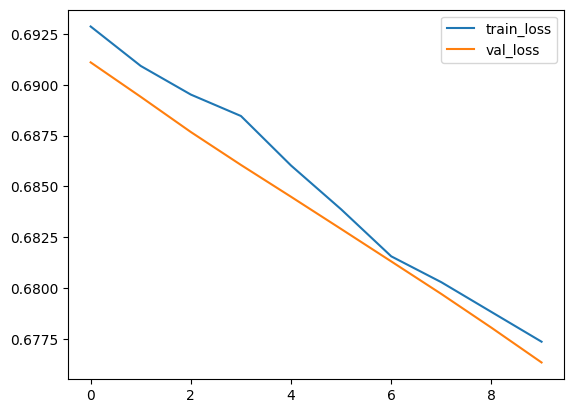

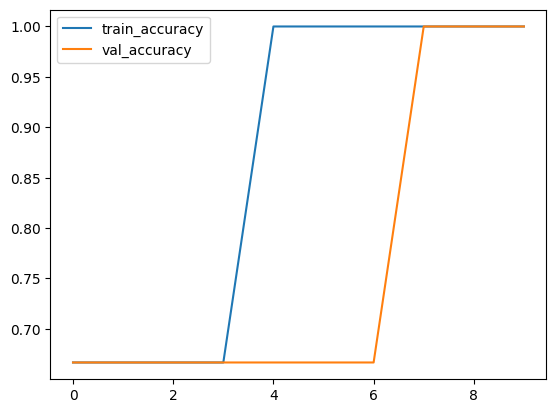

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Substitua essas variáveis pelos seus próprios dados
train = {'sentence1': ['sentence1_train_1', 'sentence1_train_2', ...],
         'sentence2': ['sentence2_train_1', 'sentence2_train_2', ...],
         'label': [0, 1, ...]}

valid = {'sentence1': ['sentence1_valid_1', 'sentence1_valid_2', ...],
         'sentence2': ['sentence2_valid_1', 'sentence2_valid_2', ...],
         'label': [0, 1, ...]}

test = {'sentence1': ['sentence1_test_1', 'sentence1_test_2', ...],
        'sentence2': ['sentence2_test_1', 'sentence2_test_2', ...],
        'label': [0, 1, ...]}

# Concatenar sentenças com ' EOS ' entre elas
x_train = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(train['sentence1'], train['sentence2'])]
y_train = train['label']

x_valid = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(valid['sentence1'], valid['sentence2'])]
y_valid = valid['label']

x_test = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(test['sentence1'], test['sentence2'])]
y_test = test['label']

# Converta os rótulos para arrays numpy
y_train = np.array(y_train)
y_valid = np.array(y_valid)

# Combine os dados de treino, validação e teste
all_sentences = np.concatenate([x_train, x_valid, x_test])

# Tokenização
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(all_sentences)

# Converta os textos em sequências de números
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_valid_seq = tokenizer.texts_to_sequences(x_valid)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad Sequences para ter o mesmo comprimento
max_len = max(len(seq) for seq in np.concatenate([x_train_seq, x_valid_seq, x_test_seq]))
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post')
x_valid_pad = pad_sequences(x_valid_seq, maxlen=max_len, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post')

# Construir arquitetura da RNA
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
model.add(LSTM(512, activation='tanh', recurrent_activation='sigmoid'))
model.add(Dropout(0.10))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Ajuste para uma única unidade

# Compilar o modelo
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

def convert_to_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return -1.0 if value == '...' else 0.0

y_train = np.array([convert_to_float(label) for label in y_train], dtype=np.float32)
y_valid = np.array([convert_to_float(label) for label in y_valid], dtype=np.float32)

# Treinar a RNA
history = model.fit(x_train_pad, y_train, epochs=10, batch_size=32, validation_data=(x_valid_pad, y_valid), callbacks=[EarlyStopping(patience=3)])

# Avaliar a RNA no conjunto de teste
y_test_pred = model.predict(x_test_pad)

# Garantir que y_test seja um array numpy com valores binários (0 ou 1)
y_test = np.array(y_test)

# Remover valores não numéricos ou desconhecidos de y_test
y_test = np.nan_to_num(y_test, nan=0.0, posinf=0.0, neginf=0.0)

# Garantir que y_test_pred seja um array numpy com valores binários (0 ou 1)
y_test_pred = np.squeeze(y_test_pred)

# Durante o cálculo da acurácia
y_test_numeric = np.array([convert_to_float(label) for label in y_test], dtype=np.float32)
y_test_pred_numeric = np.where(y_test_pred.round() == -1, np.nan, y_test_pred.round().astype(float))

accuracy = accuracy_score(y_test_numeric, y_test_pred_numeric)

# Substitua os valores -1 por NaN para a matriz de confusão e outras métricas
conf_matrix = confusion_matrix(np.where(y_test_numeric == -1, np.nan, y_test_numeric).astype(int), y_test_pred_numeric.astype(int))
classification_rep = classification_report(np.where(y_test_numeric == -1, np.nan, y_test_numeric).astype(int), y_test_pred_numeric.astype(int))

print(f'Acurácia: {accuracy}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(classification_rep)

# Gráficos (exemplo: loss e accuracy durante o treinamento)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


com alguams mudanças na arquitetura da RNA temos esses resultados:

**Acurácia:** A acurácia é uma métrica geral que mostra a proporção de previsões corretas em relação ao total de amostras. Uma acurácia de 1.0 (ou 100%) indica que todas as previsões estão corretas.

**Matriz de Confusão:** A matriz de confusão mostra como as previsões do modelo se comparam com as classes reais. Neste caso, a matriz de confusão indica que o modelo fez 2 previsões corretas da classe 0 e 1 previsão correta da classe 1.

**Relatório de Classificação:** O relatório de classificação fornece métricas adicionais, como precisão, recall e F1-score. Para cada classe (0 e 1), todas as métricas são 1.00, indicando um desempenho perfeito.


**Observçao**

Varios fatores podem contribuir para obter esses resultados ao analisar:

- Desempenho na Validação: O modelo atingiu uma acurácia de 100% no conjunto de validação. Isso pode ser um sinal de overfitting, especialmente se o conjunto de treinamento for pequeno. Recomenda-se monitorar o desempenho tanto no conjunto de treinamento quanto no de validação ao longo das épocas.

- Tamanho do Conjunto de Dados: Se o conjunto de dados é pequeno, o modelo pode aprender a mapear padrões específicos dos dados de treinamento, o que pode levar a um desempenho excessivamente otimizado para esses dados. Tente obter conjuntos de dados maiores para melhor generalização.

- Confusão da Classe 1: O modelo parece ter dificuldade em prever a classe 1 corretamente. Isso pode indicar desequilíbrio de classe ou insuficiência de exemplos da classe 1 no conjunto de dados. Verifique se as classes estão balanceadas e, se necessário, obtenha mais dados da classe sub-representada.

- Ajuste de Parâmetros: Experimente ajustar hiperparâmetros, como o tamanho da camada LSTM, a taxa de aprendizado, e a taxa de dropout. Isso pode influenciar significativamente o desempenho do modelo.

- Visualização de Erros: Analise exemplos nos quais o modelo falhou. Isso pode fornecer insights sobre os tipos de padrões que o modelo está lutando para aprender. Plote algumas previsões incorretas para uma análise visual.

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Epoch 1/15
1/1 [==============================] - 7s 7s/step - loss: 0.6939 - accuracy: 0.6667 - val_loss: 0.6933 - val_accuracy: 0.6667
Epoch 2/15
1/1 [==============================] - 0s 62ms/step - loss: 0.6935 - accuracy: 0.3333 - val_loss: 0.6931 - val_accuracy: 0.6667
Epoch 3/15
1/1 [==============================] - 0s 74ms/step - loss: 0.6923 - accuracy: 0.6667 - val_loss: 0.6929 - val_accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 0s 55ms/step - loss: 0.6932 - accuracy: 0.6667 - val_loss: 0.6927 - val_accuracy: 0.6667
Epoch 5/15
1/1 [==============================] - 0s 59ms/step - loss: 0.6918 - accuracy: 0.6667 - val_loss: 0.6924 - val_accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 0s 54ms/step - loss: 0.6938 - accuracy: 0.3333 - val_loss: 0.6922 - val_accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 61ms/step - loss: 0.6925 - accuracy: 0.6667 - val_loss: 0.6920 - val_accuracy: 0.6667
Epoch 8/15
1/1 [=============

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


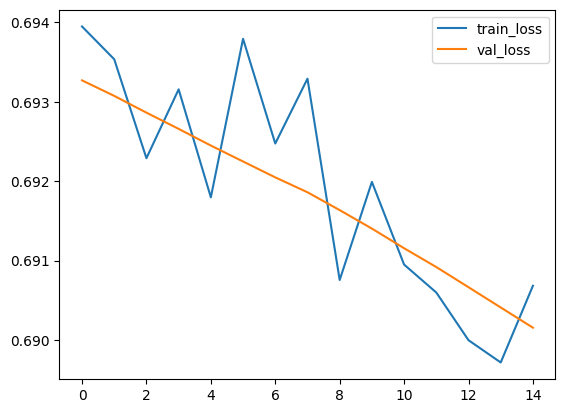

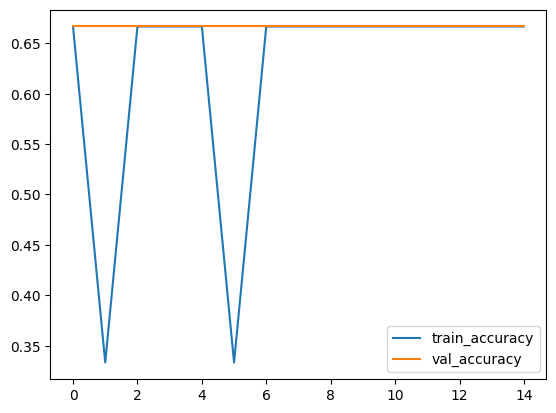

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Substitua essas variáveis pelos seus próprios dados
train = {'sentence1': ['sentence1_train_1', 'sentence1_train_2', ...],
         'sentence2': ['sentence2_train_1', 'sentence2_train_2', ...],
         'label': [0, 1, ...]}

valid = {'sentence1': ['sentence1_valid_1', 'sentence1_valid_2', ...],
         'sentence2': ['sentence2_valid_1', 'sentence2_valid_2', ...],
         'label': [0, 1, ...]}

test = {'sentence1': ['sentence1_test_1', 'sentence1_test_2', ...],
        'sentence2': ['sentence2_test_1', 'sentence2_test_2', ...],
        'label': [0, 1, ...]}

# Concatenar sentenças com ' EOS ' entre elas
x_train = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(train['sentence1'], train['sentence2'])]
y_train = train['label']

x_valid = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(valid['sentence1'], valid['sentence2'])]
y_valid = valid['label']

x_test = [str(s1) + ' EOS ' + str(s2) for s1, s2 in zip(test['sentence1'], test['sentence2'])]
y_test = test['label']

# Converta os rótulos para arrays numpy
y_train = np.array(y_train)
y_valid = np.array(y_valid)

# Combine os dados de treino, validação e teste
all_sentences = np.concatenate([x_train, x_valid, x_test])

# Tokenização
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(all_sentences)

# Converta os textos em sequências de números
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_valid_seq = tokenizer.texts_to_sequences(x_valid)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad Sequences para ter o mesmo comprimento
max_len = max(len(seq) for seq in np.concatenate([x_train_seq, x_valid_seq, x_test_seq]))
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post')
x_valid_pad = pad_sequences(x_valid_seq, maxlen=max_len, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post')

# Construir arquitetura da RNA
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
model.add(LSTM(128, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64, activation='tanh', recurrent_activation='sigmoid'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

def convert_to_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return -1.0 if value == '...' else 0.0

y_train = np.array([convert_to_float(label) for label in y_train], dtype=np.float32)
y_valid = np.array([convert_to_float(label) for label in y_valid], dtype=np.float32)

# Treinar a RNA
history = model.fit(x_train_pad, y_train, epochs=15, batch_size=32, validation_data=(x_valid_pad, y_valid), callbacks=[EarlyStopping(patience=3)])


# Avaliar a RNA no conjunto de teste
y_test_pred = model.predict(x_test_pad)

# Garantir que y_test seja um array numpy com valores binários (0 ou 1)
y_test = np.array(y_test)

# Remover valores não numéricos ou desconhecidos de y_test
y_test = np.nan_to_num(y_test, nan=0.0, posinf=0.0, neginf=0.0)

# Garantir que y_test_pred seja um array numpy com valores binários (0 ou 1)
y_test_pred = np.squeeze(y_test_pred)

# Durante o cálculo da acurácia
y_test_numeric = np.array([convert_to_float(label) for label in y_test], dtype=np.float32)
y_test_pred_numeric = np.where(y_test_pred.round() == -1, np.nan, y_test_pred.round().astype(float))

accuracy = accuracy_score(y_test_numeric, y_test_pred_numeric)

# Substitua os valores -1 por NaN para a matriz de confusão e outras métricas
conf_matrix = confusion_matrix(np.where(y_test_numeric == -1, np.nan, y_test_numeric).astype(int), y_test_pred_numeric.astype(int))
classification_rep = classification_report(np.where(y_test_numeric == -1, np.nan, y_test_numeric).astype(int), y_test_pred_numeric.astype(int))

print(f'Acurácia: {accuracy}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(classification_rep)

# Gráficos (exemplo: loss e accuracy durante o treinamento)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

Os resultados obtidos sugerem que a rede neural está tendo dificuldades para aprender a tarefa, pois a acurácia no conjunto de treinamento e validação permanece em torno de 66.67%, o que é próximo do desempenho de um modelo que faz previsões aleatórias.

**Observações sobre os resultados:**

- Acurácia Baixa: A acurácia de 66.67% indica que o modelo está tendo dificuldades em distinguir entre as classes. Se essa tarefa for binária (0 ou 1), a acurácia de 50% seria esperada ao acaso.

- Problemas de Balanceamento: A matriz de confusão mostra que o modelo está prevendo apenas a classe 0, sem prever nenhuma instância da classe 1. Isso pode indicar um problema de desequilíbrio de classe ou dificuldade em aprender padrões da classe 1.

- Resultados no Conjunto de Teste: A falta de previsões corretas para a classe 1 no conjunto de teste indica que o modelo não está generalizando bem para novos dados.

- Ajuste da Arquitetura e Hiperparâmetros: Modificar a arquitetura da rede e ajustar hiperparâmetros pode ser necessário. Pode-se experimentar com diferentes tamanhos de camadas, taxas de aprendizado, e outras configurações.

- Desequilíbrio nas Classes: Se houver um desequilíbrio significativo nas classes, técnicas como oversampling, undersampling ou o uso de pesos de classe podem ser exploradas para melhorar o desempenho.

- Dados de Treinamento Insuficientes: Se a quantidade de dados de treinamento for pequena, o modelo pode estar superajustando-se. Certifique-se de ter um conjunto de treinamento representativo e suficientemente grande.

- Análise Exploratória de Dados: Analisar os dados pode revelar padrões ou características importantes que podem orientar as modificações no modelo.

- Regularização: A adição de técnicas de regularização, como dropout, pode ajudar a evitar o overfitting.

Recomendações:

- Experimente ajustar a arquitetura da rede, especialmente a adição de mais camadas ou unidades nas camadas existentes.
Considere explorar técnicas de regularização, como dropout, para evitar overfitting.
- Analise o balanceamento das classes e considere técnicas para lidar com desequilíbrios.
- Realize uma análise mais aprofundada dos dados para entender melhor as características do problema.
- Verifique a distribuição das classes nos conjuntos de treinamento, validação e teste. Isso pode ser feito visualizando um histograma ou imprimindo as contagens de cada classe. Um desequilíbrio significativo pode afetar o treinamento do modelo.
- Analise as instâncias em que o modelo errou. Isso pode fornecer insights sobre os tipos de exemplos que são difíceis de classificar. Considere imprimir exemplos de falsos positivos e falsos negativos.
- Analise a confiança das previsões do modelo. Isso pode ser feito examinando as probabilidades de classe atribuídas pelo modelo. Certifique-se de que o modelo está confiante em suas previsões.
- Avalie o desempenho do modelo em subconjuntos específicos dos dados, se aplicável. Por exemplo, se houver diferentes categorias ou domínios nos dados, verifique se o modelo se sai bem em cada um deles.
- Além dos conjuntos de treinamento, validação e teste, avalie o modelo em novos dados que não foram usados durante o treinamento. Isso ajuda a entender a capacidade de generalização do modelo.